C:\Users\Lenovo\AppData\Roaming\Python\Python39\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
<ipython-input-1-cd9ef5cf35af>:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['IPG2211A2N'].fillna(data['IPG2211A2N'].mean(), inplace=True)
<ipython-input-1-cd9ef5cf35af>:25: FutureWarning: 'M' is deprecated and will be removed in a future version, pl

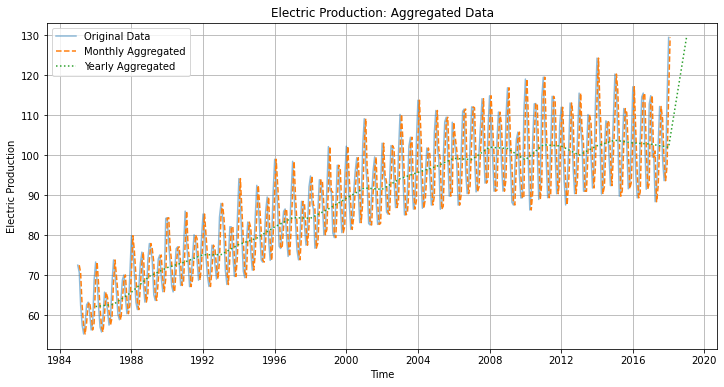

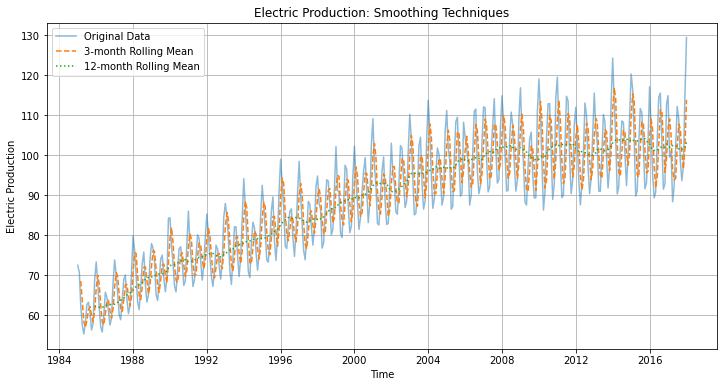

Aggregation and smoothing techniques applied successfully on the time series dataset.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the stock data
file_path = r'Electric_Production.csv'
data = pd.read_csv(file_path)

# Ensure column names have no leading/trailing spaces
data.columns = data.columns.str.strip()

# Check if the relevant column exists
if 'IPG2211A2N' not in data.columns:
    raise KeyError("'IPG2211A2N' column not found in the dataset. Please check the column name.")

# Convert 'DATE' column to datetime format
data['DATE'] = pd.to_datetime(data['DATE'])
data.set_index('DATE', inplace=True)

# Handling Missing Values
data['IPG2211A2N'].fillna(data['IPG2211A2N'].mean(), inplace=True)

# Aggregation: Resampling data to monthly and yearly means
monthly_data = data['IPG2211A2N'].resample('M').mean()
yearly_data = data['IPG2211A2N'].resample('Y').mean()

# Smoothing: Using rolling mean to remove short-term fluctuations
rolling_mean_3 = data['IPG2211A2N'].rolling(window=3).mean()
rolling_mean_12 = data['IPG2211A2N'].rolling(window=12).mean()

# Plotting original data vs aggregated and smoothed data
plt.figure(figsize=(12, 6))
plt.plot(data['IPG2211A2N'], label='Original Data', alpha=0.5)
plt.plot(monthly_data, label='Monthly Aggregated', linestyle='dashed')
plt.plot(yearly_data, label='Yearly Aggregated', linestyle='dotted')
plt.title('Electric Production: Aggregated Data')
plt.xlabel('Time')
plt.ylabel('Electric Production')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(data['IPG2211A2N'], label='Original Data', alpha=0.5)
plt.plot(rolling_mean_3, label='3-month Rolling Mean', linestyle='dashed')
plt.plot(rolling_mean_12, label='12-month Rolling Mean', linestyle='dotted')
plt.title('Electric Production: Smoothing Techniques')
plt.xlabel('Time')
plt.ylabel('Electric Production')
plt.legend()
plt.grid(True)
plt.show()

# Result:
print("Aggregation and smoothing techniques applied successfully on the time series dataset.")

